In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline



In [2]:

df = pd.read_excel(r"C:\Users\HP\Desktop\data sets\food relay data.xlsx")

In [3]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [4]:
# 1. create a period column based on the OrderDate

In [5]:
#we want to find the monthly behaviour of our users

In [6]:
df['OrderPeriod'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))

In [7]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [8]:
# 2. determine the users' cohort group (based on their first order)

In [9]:
#create a  Cohortgroup column which is the year and month in the which the user's first purchae occurred

In [10]:
df.set_index('UserId', inplace = True)

df['CohortGroup'] = df. groupby (level = 0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace = True)

In [11]:
df.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [12]:
# 3. Aggregate users, orders and amount  spent by the cohort group within the month (order period)

In [13]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])
grouped.groups

{('2009-01',
  '2009-01'): Int64Index([  0,   1,  78,  88,  97, 129, 130, 174, 178, 179, 180, 181, 254,
             255, 286, 297, 303, 310, 311, 334, 349, 350, 363, 415, 418, 427,
             428, 431, 437, 438],
            dtype='int64'),
 ('2009-01',
  '2009-02'): Int64Index([  2,   3,   4,   5,   6,  79, 131, 132, 133, 134, 135, 136, 137,
             138, 182, 183, 184, 185, 256, 257, 298, 299, 312, 313, 432],
            dtype='int64'),
 ('2009-01',
  '2009-03'): Int64Index([  7,   8,   9,  10,  11,  12,  80,  81,  82,  83, 139, 140, 141,
             186, 187, 188, 189, 190, 258, 259, 287, 304, 314, 351, 352, 433],
            dtype='int64'),
 ('2009-01',
  '2009-04'): Int64Index([ 13,  14,  15,  16,  17,  84,  85,  86, 142, 143, 191, 192, 193,
             194, 195, 196, 197, 198, 260, 261, 262, 263, 305, 315, 316, 317,
             429, 434],
            dtype='int64'),
 ('2009-01',
  '2009-05'): Int64Index([ 18,  19,  20,  21,  22,  23,  87, 144, 145, 146, 199, 200, 201,
 

In [14]:
#count rows in each group

In [15]:
grouped.size()

CohortGroup  OrderPeriod
2009-01      2009-01         30
             2009-02         25
             2009-03         26
             2009-04         28
             2009-05         26
                           ... 
2010-01      2010-02        101
             2010-03         31
2010-02      2010-02        139
             2010-03         19
2010-03      2010-03         26
Length: 119, dtype: int64

In [16]:
#count the unique users,orders, and total revenue per Group + Period 

In [17]:
cohorts = grouped.agg({'UserId' : pd.Series.nunique,
                       'OrderId' : pd.Series.nunique,
                       'TotalCharges': np.sum})


In [18]:
#make the column  names more meaningful

In [19]:
cohorts.rename(columns = {'UserId': 'TotalUsers',
                         'OrderId': 'TotalOrders'}, inplace = True)

In [20]:
cohorts.head()

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-01              22           30      1850.255
            2009-02               8           25      1351.065
            2009-03              10           26      1357.360
            2009-04               9           28      1604.500
            2009-05              10           26      1575.625

In [21]:
# 4. label the cohortperiod for each group ie cperiod = 1 equals first month ==2 equals second month

In [22]:
#creating a function cohort_period

In [23]:
def cohort_period(df):
    """
    creates a 'CohortPeriod'column, which is the Nth period based on the user's first purchase
    
    Example
    ------
    Say you want to get the 3rd month for every users:
        df.sort(['UserId','OrderTime', inplace = True])
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df ['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [24]:
cohorts = cohorts.groupby (level= 0).apply(cohort_period)
cohorts.head()


TotalUsers  TotalOrders  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                                     
2009-01     2009-01              22           30      1850.255             1
            2009-02               8           25      1351.065             2
            2009-03              10           26      1357.360             3
            2009-04               9           28      1604.500             4
            2009-05              10           26      1575.625             5

In [25]:
#percentage change of each cohortgroup over time

In [27]:
#reindex the DataFrame
cohorts.reset_index (inplace=True)
cohorts.set_index(['CohortGroup','CohortPeriod'], inplace = True)

In [28]:
#create a Series holding the total sizee of each cohortgroup

In [29]:
cohort_group_size = cohorts['TotalUsers'].groupby(level= 0).first()
cohort_group_size.head()

CohortGroup
2009-01    22
2009-02    15
2009-03    13
2009-04    39
2009-05    50
Name: TotalUsers, dtype: int64

In [30]:
#unstacking the total users to show the cohort groups and each row of the cohort periosd corresponding to that group

In [31]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,NaN
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,NaN,NaN
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,NaN,NaN,NaN
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN


In [34]:
#dividing each column by the corresponding cohort_group_size
#creating user_retention - the percentage of users from the cohort purchasing within the given period

In [33]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size,axis=1)
user_retention .head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#plotting the cohorts overtime to spot behavioural patterns

Text(0, 0.5, '% of Cohort Purchasing')

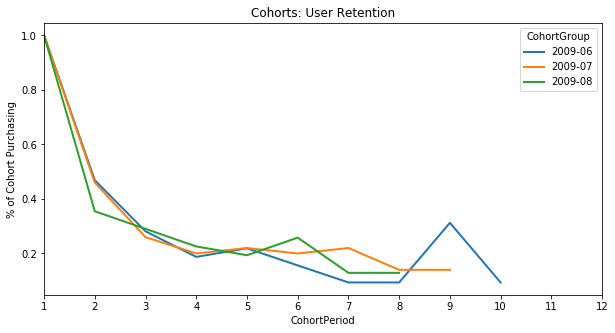

In [37]:
user_retention[['2009-06','2009-07','2009-08']].plot(figsize = (10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1,12.1,1))
plt.xlim(1,12)
plt.ylabel('% of Cohort Purchasing')

In [39]:
#creating heatmaps with seaborn

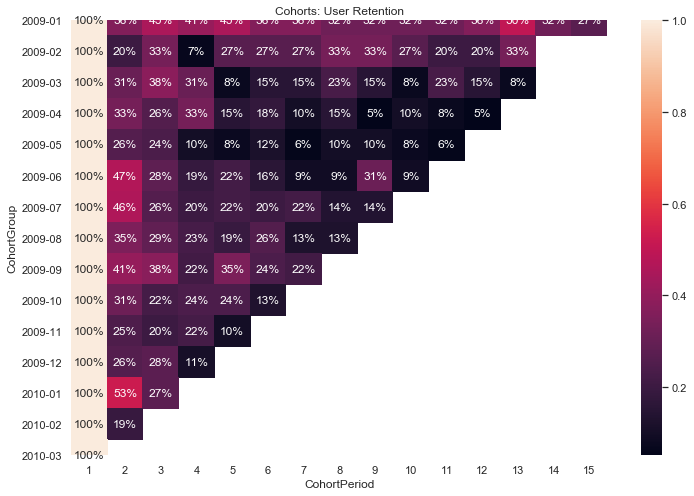

In [42]:
import seaborn as sns
sns.set (style ='white')
plt.figure(figsize= (12,8))
plt.title ('Cohorts: User Retention')
sns.heatmap(user_retention. T, mask = user_retention.T.isnull(), annot = True, fmt = '.0%')